#Caputo fractional derivative



$^C_0D^\alpha_t y(t_n) = - y(t), \quad 0 < \alpha < 1$

$y(0)=1$


#L1 Discretization



1.   Time Discretization: Divide the time interval $[0,T]$ into $N$ equal subintervals of length $h=\frac{T}{N}$. The time points are $t_k = kh$ for $k=0,1,...,N$.

2.   L1 Approximation: The Caputo fractional derivative at time $t_n$ is approximated using the L1 method:

$^C_0D^\alpha_t y(t_n) ≈ \frac{1}{h^\alpha} \sum_{k=0}^{n-1} b_{n-k} y(t_k)$,

where the coefficients $b_{n-k}$ are given by:

$b_{n-k} = (n-k+1)^{1-\alpha} - (n-k)^{1-\alpha}$

3.   Discrete Form of the Differential Equation: Substitute the L1 approximation into the differential equation:

$\frac{1}{h^\alpha} \sum_{k=0}^{n-1} b_{n-k} y(t_k) = -y(t_n)$

Rearrange to solve for $y(t_n)$:

$ y(t_n) = \frac{1}{1+h^\alpha} \sum_{k=0}^{n-1} b_{n-k} y(t_k) $


Time points: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
y values: [1.         0.03482648 0.02215167 0.01661655 0.01344438 0.01136634
 0.00989022 0.00878282 0.0079186  0.00722372 0.00665177 0.00617204
 0.00576337 0.00541068 0.00510292 0.00483181 0.004591   0.00437555
 0.00418155 0.00400585 0.00384592 0.00369966 0.00356535 0.00344154
 0.00332701 0.00322072 0.00312178 0.00302945 0.00294306 0.00286203
 0.00278587 0.00271414 0.00264645 0.00258247 0.00252187 0.0024644
 0.00240981 0.00235788 0.00230842 0.00226125 0.00221621 0.0021

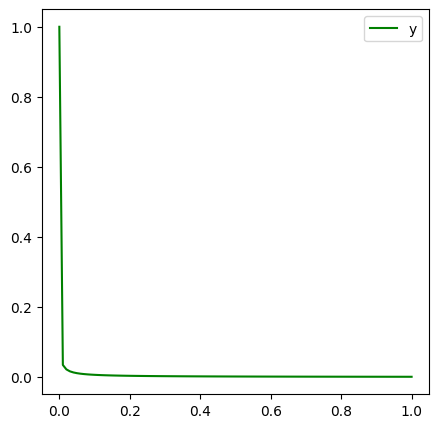

In [33]:
import numpy as np

def l1_coefficients(n, alpha):
    return [(n - k + 1)**(1 - alpha) - (n - k)**(1 - alpha) for k in range(n)]

def l1_method(alpha, T, N):
    h = T / N
    y = np.zeros(N + 1)
    y[0] = 1  # initial condition y(0) = 1

    for n in range(1, N + 1):
        coeffs = l1_coefficients(n, alpha)
        sum_b_y = sum(coeffs[k] * y[k] for k in range(n))
        y[n] = (1 / (1 + h**alpha)) * sum_b_y

    return y

# Parameters
alpha = 0.95
T = 1
N = 100

y_values = l1_method(alpha, T, N)
print("Time points:", np.linspace(0, T, N + 1))
print("y values:", y_values)

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

axs.plot(np.linspace(0, T, N + 1), y_values, "g-", label="y")
axs.legend()
fig.show()
plt.show()

#L2 Discretization



1.   Time Discretization: Divide the time interval $[0,T]$ into $N$ equal subintervals of length $h=\frac{T}{N}$. The time points are $t_k = kh$ for $k=0,1,...,N$.

2.   L1 Approximation: The Caputo fractional derivative at time $t_n$ is approximated using the L2 method:

$^C_0D^\alpha_t y(t_n) \approx \frac{1}{h^\alpha} \sum_{k=0}^{n-1} A_{n-k} y(t_k) + B_n y(t_n)$,

where the coefficients $A_{n-k}$ and $B_n$ are given by:

$A_{n-k} = ((n-k+1)^{2-\alpha} - (n-k)^{2-\alpha}) - ((n-k)^{2-\alpha} - (n-k-1)^{2-\alpha})$

$B_{n} = (1-\alpha) (n^{1-\alpha} - (n-1)^{1-\alpha})$

3.   Discrete Form of the Differential Equation: Substitute the L2 approximation into the differential equation:

$\frac{1}{h^\alpha} \sum_{k=0}^{n-1} A_{n-k} y(t_k) + B_n y(t_n) = -y(t_n)$

Rearrange to solve for $y(t_n)$:

$ y(t_n) = \frac{\sum_{k=0}^{n-1} A_{n-k} y(t_k)}{h^\alpha - B_n} $


Time points: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
y values: [ 1.00000000e+00 -1.88528312e+00 -9.66436582e+00 -6.21243084e+01
 -3.95536490e+02 -2.49041236e+03 -1.55608445e+04 -9.67057573e+04
 -5.98602549e+05 -3.69395215e+06 -2.27397453e+07 -1.39707306e+08
 -8.56916520e+08 -5.24874784e+09 -3.21113134e+10 -1.96252465e+11
 -1.19834842e+12 -7.31152860e+12 -4.45788331e+13 -2.71629453e+14
 -1.65416945e+15 -1.00684237e+16 -6.12549926e+16 -3.72509650e+17
 -2.26446129e+18 -1.37605906e+19 -8.35922357e+19 -5.07647294e+20
 -3.0820

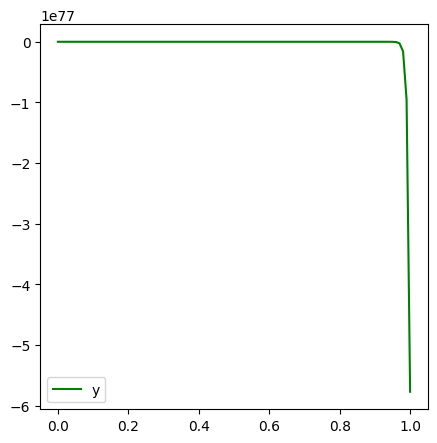

In [34]:
import numpy as np

def l2_coefficients(n, alpha):
    A = [(n - k + 1)**(2 - alpha) - (n - k)**(2 - alpha) - ((n - k)**(2 - alpha) - (n - k - 1)**(2 - alpha)) for k in range(n)]
    B = (1 - alpha) * (n**(1 - alpha) - (n - 1)**(1 - alpha))
    return A, B

def l2_method(alpha, T, N):
    h = T / N
    y = np.zeros(N + 1)
    y[0] = 1  # initial condition y(0) = 1

    for n in range(1, N + 1):
        A, B = l2_coefficients(n, alpha)
        sum_A_y = sum(A[k] * y[k] for k in range(n))
        y[n] = sum_A_y / (h**alpha - B)

    return y

# Parameters
alpha = 0.95
T = 1
N = 100

y_values = l2_method(alpha, T, N)
print("Time points:", np.linspace(0, T, N + 1))
print("y values:", y_values)


import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

axs.plot(np.linspace(0, T, N + 1), y_values, "g-", label="y")
axs.legend()
fig.show()
plt.show()